<a href="https://colab.research.google.com/github/athulyaps2508/colab/blob/master/train_5dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data = pd.read_csv("training_data.csv", names = ["Q1", "Q2", "Q3","Q4","Q5" , "X", "Y", "Theta"])


In [21]:
data.head()

,Q1,Q2,Q3,Q4,Q5,X,Y,Theta
0,0.51,0.33,1.29,0.46,0.40,-1.66,6.26,171.31
1,1.20,0.88,0.92,1.12,1.10,-2.37,0.57,299.08
2,2.27,0.55,1.11,1.07,0.23,-3.04,-3.09,299.66
3,2.83,0.04,1.25,0.08,1.19,-4.67,-4.00,308.82
4,1.16,0.98,1.46,0.02,1.34,-3.36,0.79,284.19


In [0]:
#data['Q4'] = 0
#data['Q5'] = 0
data['Q6'] = 0
data['Q7'] = 0

In [0]:
np.random.seed(0)

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
x_data = data.iloc[:, [5,6,7]]
y_data = data.iloc[:,[0,1,2,3,4,8,9]]


In [26]:
y_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,0.51,0.33,1.29,0.46,0.40,0,0
1,1.20,0.88,0.92,1.12,1.10,0,0
2,2.27,0.55,1.11,1.07,0.23,0,0
3,2.83,0.04,1.25,0.08,1.19,0,0
4,1.16,0.98,1.46,0.02,1.34,0,0
...,...,...,...,...,...,...,...
995,1.03,0.15,0.43,1.26,0.51,0,0
996,1.23,0.82,1.14,0.27,0.95,0,0
997,0.67,0.44,0.36,0.12,0.74,0,0
998,0.37,1.43,0.26,0.69,1.34,0,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
scaled_x_train = scaler.fit_transform(x_train)
#x_eval, x_test, y_eval, y_test = train_test_split(x_test,y_test, test_size=0.25, random_state=101)
#scaled_x_eval = scaler.transform(x_eval)
scaled_x_test = scaler.transform(x_test)

In [0]:
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(7, activation='linear'))

In [0]:
from keras.layers import Dense, Activation

In [0]:
from keras.optimizers import Adam
adamOpti = Adam(lr = 0.001) 

In [33]:
model.compile(loss='mean_squared_error', optimizer=adamOpti,metrics=["accuracy"])
history = model.fit(scaled_x_train, y_train, validation_data=(scaled_x_test,y_test), batch_size=128, epochs=2000,shuffle = True,verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/2000
800/800 [==============================] - 0s 492us/step - loss: 0.9396 - acc: 0.1237 - val_loss: 0.8786 - val_acc: 0.0700
Epoch 2/2000
800/800 [==============================] - 0s 25us/step - loss: 0.8209 - acc: 0.1288 - val_loss: 0.7961 - val_acc: 0.0700
Epoch 3/2000
800/800 [==============================] - 0s 27us/step - loss: 0.7269 - acc: 0.1288 - val_loss: 0.6790 - val_acc: 0.0700
Epoch 4/2000
800/800 [==============================] - 0s 23us/step - loss: 0.5948 - acc: 0.1288 - val_loss: 0.5308 - val_acc: 0.0700
Epoch 5/2000
800/800 [==============================] - 0s 26us/step - loss: 0.4474 - acc: 0.1288 - val_loss: 0.3944 - val_acc: 0.0700
Epoch 6/2000
800/800 [==============================] - 0s 24us/step - loss: 0.3359 - acc: 0.1525 - val_loss: 0.3224 - val_acc: 0.6050
Epoch 7/2000
800/800 [==============================] - 0s 26us/step - loss: 0.2852 - acc: 0.5737 - val_loss: 0.2746 - val_acc: 0.6200
Epoch 8/

In [0]:
from matplotlib import pyplot

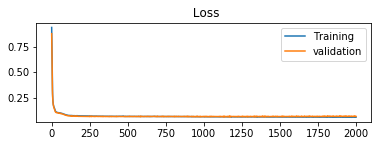

In [35]:
pyplot.subplot(211)
pyplot.title(' Loss')
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
plt.legend(['Training', 'validation'])

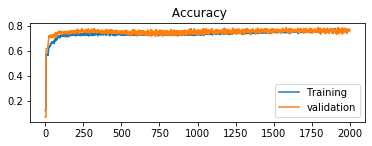

In [36]:
pyplot.subplot(212)
pyplot.title(' Accuracy')
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
plt.legend(['Training', 'validation'])